# 3a. Bag of Words Word Vectorizing Methods (I): Count Vectorizer

It's time to prepare the data for machine learning. Now, I will use Count Vectorizer to capture the frequency each word appears in the reviews. First, I will provide some background information on Bag-of-Words models, the category where Count Vectorizer belongs to.

We cannot work with text directly when using machine learning algorithms.

Instead, we need to convert the text to numbers.

We may want to perform classification of documents, so each document is an “input” and a class label is the “output” for our predictive algorithm. Algorithms take vectors of numbers as input, therefore we need to convert documents to fixed-length vectors of numbers.

A simple and effective model for thinking about text documents in machine learning is called the Bag-of-Words Model, or BoW.

The model is simple in that it throws away all of the order information in the words and focuses on the occurrence of words in a document.

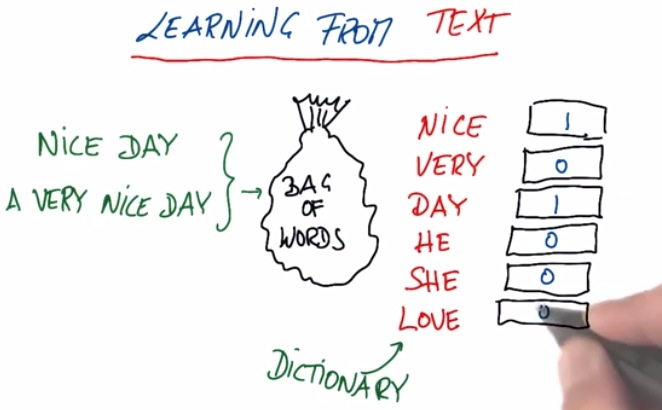

This can be done by assigning each word a unique number. Then any document we see can be encoded as a fixed-length vector with the length of the vocabulary of known words. The value in each position in the vector could be filled with a count or frequency of each word in the encoded document.

This is the bag of words model, where we are only concerned with encoding schemes that represent what words are present or the degree to which they are present in encoded documents without any information about order.

There are many ways to extend this simple method, both by better clarifying what a “word” is and in defining what to encode about each word in the vector.

The scikit-learn library provides 3 different schemes that we can use, and here, I will start with Count Vectorizer.

In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import BernoulliNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from  sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data into a DataFrame
df = pd.read_csv('2_explored.csv', index_col=0)
df.head()

,sex,rating,product,review,review_date,reviewer_id,clean_text,review_month,review_length
0,f,1,service,"İstanbul'da en sevdiğim mekan, analog dostu. M...",2017-03-08,44720,istanbulda sevdigim mekan analog dostu minicik...,Mar,21
1,f,1,studio,KESİNLİKLE ÇOK GÜZEL BİR STÜDYO,2017-10-17,46945,kesinlikle guzel studyo,Oct,5
2,f,1,service,Burayı hep sevdim,2017-01-03,92805,buray sevdim,Jan,3
3,m,1,wedding,"Düğün fotoğrafı için gitmiştik, çok güzel çeki...",2017-01-19,51670,dugun gitmistik guzel cekimler yaptlar hazrlad...,Jan,19
4,f,0,service,O kadar iyi diil tabi. Isim var sadece,2017-11-05,79719,kadar iyi diil tabi isim var sadece,Nov,9


Here, I will vectorize the text and transform it to a matrix form so that I can feed the matrix to machine learning algorithms. Xs are the words and y is the rating stored in 'rating' column.

In [3]:
vect = CountVectorizer(ngram_range=(1,1))
                       
vect.fit(df.clean_text)
X = vect.transform(df.clean_text)

# transform the resulting sparse matrix into an array
my_array = X.toarray()

# check the vocabulary length
vocab = vect.get_feature_names()
print('Number of words in the vocabulary: ', len(vocab))

# back to df, assign column names
X_df = pd.DataFrame(my_array, columns = vocab)

# check the vector matrix
X_df.head()

Number of words in the vocabulary:  4248


,abartlan,abi,abicim,abilerim,abimiz,abimizin,ac,acaip,acar,acayip,...,zor,zordu,zorla,zorlandk,zorlu,zorluk,zorunda,zorundalar,zorundaydm,zorunlu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# assign the target variable 'rating' to y
y = df.rating

I will train the data on one set and test on a set not seen before to reduce bias.

In [5]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 123,
                                                    stratify = y)

In [6]:
type(y_test)

pandas.core.series.Series

I will define a function to better visualize the test results given by the confusion matrix.

In [7]:
# Function for plotting a good-looking confusion matrix

def plot_confusion_matrix(y_test, y_pred, title, color):
    
    '''This function takes as input: 
            a target test variable y_test (pandas series of type integer), 
            a target predicted variable y_pred (pandas series of type integer), 
            a colormap color (string) and 
            a title (string). 
        It plots a confusion matrix of y_test and y_pred with the input colormap.
    '''
    
    cm_ratio = np.round(confusion_matrix(y_test, y_pred) / len(y_test), decimals=2)
    fig = plt.figure(figsize=(4, 4))
    plt.clf()
    plt.style.use('classic')
    plt.imshow(cm_ratio, interpolation='nearest', cmap=color)
    classNames = ['Neg_Review',' Pos_Review']
    plt.title(title, fontsize=20)
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, fontsize=15)
    plt.yticks(tick_marks, classNames, fontsize=15, rotation=90)
    s = [['TNR','FPR'], ['FNR', 'TPR']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm_ratio[i][j]), fontsize=15, 
                 fontweight='bold', horizontalalignment="center")
    return plt.show()

I will code a function to facilitate fitting a classifier to training data, predicting on test data, printing the accuracy and cross validation scores along with the classification report and showing the confusion matrix results using the function above.

In [8]:
def fit_predict_print_plot(my_classifier, my_title):
    
    '''This function takes an instance of a classifier and my_title string, fits to training data, 
    predicts on test data, prints and plots the results'''
    
    # Fitting the classifier to the training data split
    my_classifier.fit(X_train, y_train)

    # Predicting on the test split
    y_predicted = my_classifier.predict(X_test)

    # Checking the accuracy and the cross validation scores
    print('accuracy on training set: ', my_classifier.score(X_train, y_train))
    print('accuracy on test set: ', accuracy_score(y_test, y_predicted))
    print('croos validation score on whole data set: ', 
          np.mean(cross_val_score(my_classifier, X, y, cv = 5)), '\n')

    # Checking the results with the Classification report
    print (classification_report(y_test, y_predicted))
    
    # Checking the results visually by Plotting the confusion matrix with "plot_confusion_matrix" function I defined above
    plot_confusion_matrix(y_test, y_predicted, 
                      title = my_title, 
                      color=plt.cm.Set3)
    return(y_predicted)

Starting with logistic regression, I will use different classification algorithms to predict the ratings of the reviews. Namely: Logistic Regression, K-Nearest Neighbors, Linear Support Vector Machines (SVM), Kernel SVM, Naive Bayes, Decision Trees, Random Forest, AdaBoost, Gradient Boosting, Stochastic Gradient Boosting, Extreme Gradient Boosting (XGBoost) and CatBoost.

## 3.1. Logistic Regression

accuracy on training set:  0.971764705882353
accuracy on test set:  0.8309859154929577
croos validation score on whole data set:  0.847603862166711 

              precision    recall  f1-score   support

           0       0.83      0.31      0.45        48
           1       0.83      0.98      0.90       165

    accuracy                           0.83       213
   macro avg       0.83      0.65      0.68       213
weighted avg       0.83      0.83      0.80       213



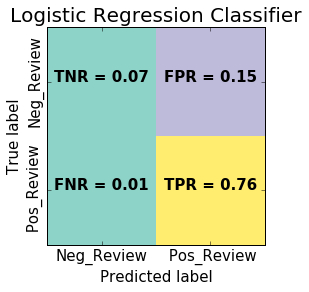

In [9]:
# Instantiating the logistic regression classifier logreg
logreg = LogisticRegression(penalty = 'l2', C = 1, solver='newton-cg', random_state=123)

# Calling the fit_predict_print_plot function I defined above
y_predicted_logreg = fit_predict_print_plot(logreg, 'Logistic Regression Classifier')

## 3.2. K-Neighbors Classifier

accuracy on training set:  0.8611764705882353
accuracy on test set:  0.7981220657276995
croos validation score on whole data set:  0.8014970325095225 

              precision    recall  f1-score   support

           0       0.65      0.23      0.34        48
           1       0.81      0.96      0.88       165

    accuracy                           0.80       213
   macro avg       0.73      0.60      0.61       213
weighted avg       0.77      0.80      0.76       213



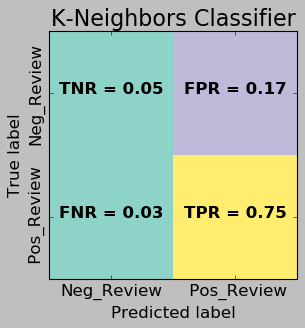

In [10]:
# Instantiating the KNeighborsClassifier knn
knn = KNeighborsClassifier(n_neighbors=5)

# Calling the fit_predict_print_plot function I defined above
y_predicted_knn = fit_predict_print_plot(knn, 'K-Neighbors Classifier')

## 3.3. Linear SVM

accuracy on training set:  0.9952941176470588
accuracy on test set:  0.8591549295774648
croos validation score on whole data set:  0.862680485428293 

              precision    recall  f1-score   support

           0       0.80      0.50      0.62        48
           1       0.87      0.96      0.91       165

    accuracy                           0.86       213
   macro avg       0.83      0.73      0.76       213
weighted avg       0.85      0.86      0.85       213



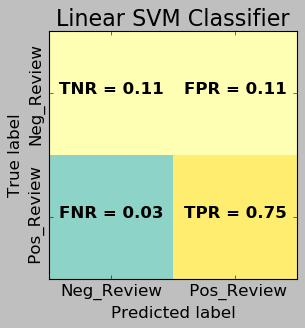

In [11]:
# Instantiating the KNeighborsClassifier knn
l_svm = SVC(kernel='linear', random_state=123)

# Calling the fit_predict_print_plot function I defined above
y_predicted_l_svm = fit_predict_print_plot(l_svm, 'Linear SVM Classifier')

## 3.4. Kernel SVM

accuracy on training set:  0.7764705882352941
accuracy on test set:  0.7746478873239436
croos validation score on whole data set:  0.7761094871113473 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.77      1.00      0.87       165

    accuracy                           0.77       213
   macro avg       0.39      0.50      0.44       213
weighted avg       0.60      0.77      0.68       213



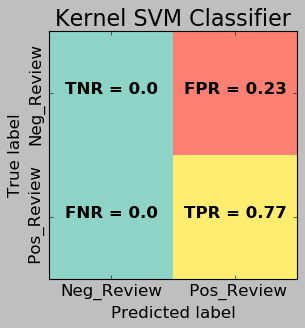

In [12]:
# Instantiating the KNeighborsClassifier knn
k_svm = SVC(kernel='rbf', gamma='auto')

# Calling the fit_predict_print_plot function I defined above
y_predicted_k_svm = fit_predict_print_plot(k_svm, 'Kernel SVM Classifier')

## 3.5. Naive Bayes

accuracy on training set:  0.96
accuracy on test set:  0.8544600938967136
croos validation score on whole data set:  0.8701612188856409 

              precision    recall  f1-score   support

           0       0.73      0.56      0.64        48
           1       0.88      0.94      0.91       165

    accuracy                           0.85       213
   macro avg       0.81      0.75      0.77       213
weighted avg       0.85      0.85      0.85       213



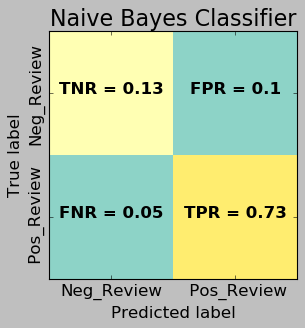

In [13]:
# Instantiating the Naive Bayes Classifier nb
nb = MultinomialNB()

# Calling the fit_predict_print_plot function I defined above
y_predicted_nb = fit_predict_print_plot(nb, 'Naive Bayes Classifier')

## 3.6. Decision Tree Classifier

accuracy on training set:  0.7764705882352941
accuracy on test set:  0.7746478873239436
croos validation score on whole data set:  0.7761094871113473 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.77      1.00      0.87       165

    accuracy                           0.77       213
   macro avg       0.39      0.50      0.44       213
weighted avg       0.60      0.77      0.68       213



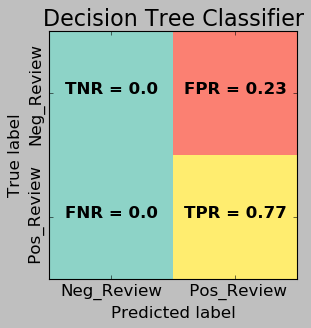

In [14]:
# Instantiating the Decision Tree Classifier dt
dt = DecisionTreeClassifier(max_depth = 6, max_features = 0.6, 
                             min_samples_leaf = 0.08, random_state = 123)

# Calling the fit_predict_print_plot function I defined above
y_predicted_dt = fit_predict_print_plot(dt, 'Decision Tree Classifier')

## 3.7. Random Forest 

accuracy on training set:  0.9988235294117647
accuracy on test set:  0.8262910798122066
croos validation score on whole data set:  0.8626583399769687 

              precision    recall  f1-score   support

           0       0.76      0.33      0.46        48
           1       0.83      0.97      0.90       165

    accuracy                           0.83       213
   macro avg       0.80      0.65      0.68       213
weighted avg       0.82      0.83      0.80       213



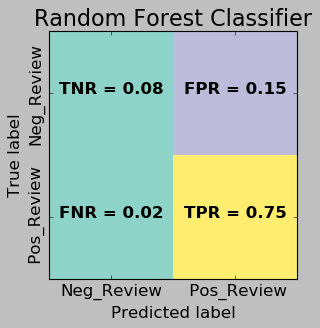

In [15]:
# Instantiating the Random Forest Classifier rf
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=123)

# Calling the fit_predict_print_plot function I defined above
y_predicted_rf = fit_predict_print_plot(rf, 'Random Forest Classifier')

## 3.8. AdaBoosting

accuracy on training set:  0.7764705882352941
accuracy on test set:  0.7746478873239436
croos validation score on whole data set:  0.7761094871113473 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.77      1.00      0.87       165

    accuracy                           0.77       213
   macro avg       0.39      0.50      0.44       213
weighted avg       0.60      0.77      0.68       213



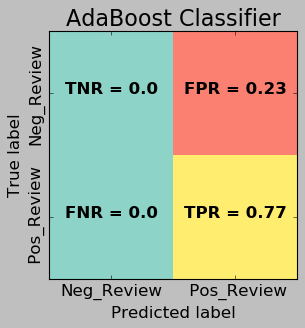

In [16]:
# Instantiating the AdaBoost Classifier adb
adb = AdaBoostClassifier(base_estimator = dt, n_estimators = 100)

# Calling the fit_predict_print_plot function I defined above
y_predicted_adb = fit_predict_print_plot(adb, 'AdaBoost Classifier')

## 3.9. GradientBoosting

accuracy on training set:  0.9870588235294118
accuracy on test set:  0.8215962441314554
croos validation score on whole data set:  0.8447736734874658 

              precision    recall  f1-score   support

           0       0.68      0.40      0.50        48
           1       0.84      0.95      0.89       165

    accuracy                           0.82       213
   macro avg       0.76      0.67      0.70       213
weighted avg       0.81      0.82      0.80       213



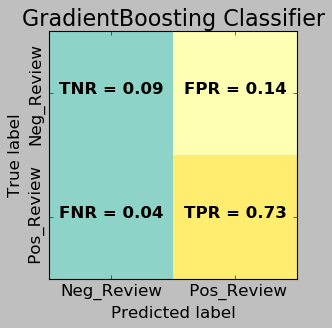

In [17]:
# Instantiating the GradientBoosting Classifier gbt
gbt = GradientBoostingClassifier(n_estimators=300, max_depth =3, random_state=123)

# Calling the fit_predict_print_plot function I defined above
y_predicted_gbt = fit_predict_print_plot(gbt, 'GradientBoosting Classifier')

## 3.10. Stochastic Gradient Boosting

accuracy on training set:  0.991764705882353
accuracy on test set:  0.8169014084507042
croos validation score on whole data set:  0.8541677739392328 

              precision    recall  f1-score   support

           0       0.67      0.38      0.48        48
           1       0.84      0.95      0.89       165

    accuracy                           0.82       213
   macro avg       0.75      0.66      0.68       213
weighted avg       0.80      0.82      0.80       213



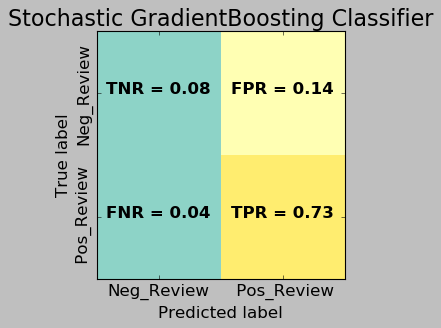

In [18]:
# Instantiating the Stochastic GradientBoosting Classifier sgbt
sgb = GradientBoostingClassifier(max_depth=3, subsample=0.8, 
                                   max_features=0.2, n_estimators=300, random_state=123)

# Calling the fit_predict_print_plot function I defined above
y_predicted_sgb = fit_predict_print_plot(sgb, 'Stochastic GradientBoosting Classifier')

## 3.11. XGBoost

accuracy on training set:  0.8752941176470588
accuracy on test set:  0.812206572769953
croos validation score on whole data set:  0.8334927805828682 

              precision    recall  f1-score   support

           0       0.75      0.25      0.38        48
           1       0.82      0.98      0.89       165

    accuracy                           0.81       213
   macro avg       0.78      0.61      0.63       213
weighted avg       0.80      0.81      0.77       213



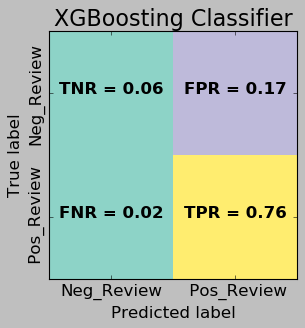

In [19]:
# Instantiating the XGBoosting Classifier xgb
xgb = XGBClassifier(random_state=123)

# Calling the fit_predict_print_plot function I defined above
y_predicted_xgb = fit_predict_print_plot(xgb, 'XGBoosting Classifier')

## 3.12. CatBoost

accuracy on training set:  0.9247058823529412
accuracy on test set:  0.8169014084507042
croos validation score on whole data set:  0.8457259278944106 

              precision    recall  f1-score   support

           0       0.68      0.35      0.47        48
           1       0.84      0.95      0.89       165

    accuracy                           0.82       213
   macro avg       0.76      0.65      0.68       213
weighted avg       0.80      0.82      0.79       213



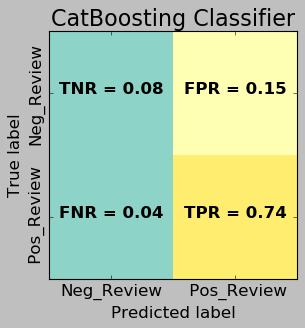

In [20]:
# Instantiating the Cat Boosting Classifier cb
cb = CatBoostClassifier(verbose=False, random_state=123)

# Calling the fit_predict_print_plot function I defined above
y_predicted_cb = fit_predict_print_plot(cb, 'CatBoosting Classifier')

## Comparison of results

I will use two functions to build a DataFrame for comparison.

In [21]:
# Function for converting the classification report results to a dataframe

def get_classification_report(y_true, y_pred):
    
    '''This function takes in true (y_true) and predicted (y_pred) values of a target variable and produces 
    a classification report '''
    
    metrics_summary = precision_recall_fscore_support(y_true=y_true, y_pred=y_pred)

    avg = list(precision_recall_fscore_support(y_true=y_true, y_pred=y_pred, average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(list(metrics_summary), index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['weighted avg'] = avg

    return class_report_df.T

In [22]:
# Function for adding explanatory columns and organizing the dataframe

def build_comparison_matrix(y_test, y_pred, algorithm, vector):
    
    '''This function builds a comparison matrix as a DataFrame, given target variable test and prediction values
    as pandas Series of integers, name of the algorithm of type string and name of the word vectorizer as string'''
    
    df = get_classification_report(y_test, y_pred)
    df['class']=['neg_review', 'pos_review', 'average']
    df['accuracy']= metrics.accuracy_score(y_test, y_pred)
    df['model'] = algorithm
    df['vectorizer'] = vector
    df = df[['vectorizer', 'model', 'accuracy', 'class', 'precision', 'recall', 'f1-score', 'support']]
    
    return df

In [23]:
#For loop using above functions to build CountVectorizing results table

frames_cv = [] # empty list for collecting dataframes

y_preds_cv = [y_predicted_logreg, y_predicted_knn, y_predicted_l_svm, y_predicted_k_svm, y_predicted_nb, y_predicted_dt,
                y_predicted_rf, y_predicted_adb, y_predicted_gbt, y_predicted_sgb, y_predicted_xgb, y_predicted_cb] 

labels_cv = ['LogReg', 'KNN', 'LSVM', 'KSVM', 'NBayes', 'DTree', 
             'RForest', 'ABoost', 'GBoost', 'SGBoost', 'XGBoost', 'CBoost'] 

vector_cv = 'CountVect'

for y_pred, label in zip(y_preds_cv, labels_cv):
    df = build_comparison_matrix(y_test, y_pred, label, vector_cv)
    frames_cv.append(df)

# concatenating all dataframes
df_cv = pd.concat(frames_cv)

df_cv2 = df_cv.set_index(['vectorizer', 'model', 'accuracy', 'class'])

In [24]:
df_cv2

precision    recall  f1-score  support
vectorizer model   accuracy class                                             
CountVect  LogReg  0.830986 neg_review   0.833333  0.312500  0.454545     48.0
                            pos_review   0.830769  0.981818  0.900000    165.0
                            average      0.831347  0.830986  0.799616    213.0
           KNN     0.798122 neg_review   0.647059  0.229167  0.338462     48.0
                            pos_review   0.811224  0.963636  0.880886    165.0
                            average      0.774229  0.798122  0.758650    213.0
           LSVM    0.859155 neg_review   0.800000  0.500000  0.615385     48.0
                            pos_review   0.868852  0.963636  0.913793    165.0
                            average      0.853336  0.859155  0.846546    213.0
           KSVM    0.774648 neg_review   0.000000  0.000000  0.000000     48.0
                            pos_review   0.774648  1.000000  0.873016    165.0
                            average      0.600079  0.774648  0.676280    213.0
           NBayes  0.854460 neg_review   0.729730  0.562500  0.635294     48.0
                            pos_review   0.880682  0.939394  0.909091    165.0
                            average      0.846664  0.854460  0.847390    213.0
           DTree   0.774648 neg_review   0.000000  0.000000  0.000000     48.0
                            pos_review   0.774648  1.000000  0.873016    165.0
                            average      0.600079  0.774648  0.676280    213.0
           RForest 0.826291 neg_review   0.761905  0.333333  0.463768     48.0
                            pos_review   0.833333  0.969697  0.896359    165.0
                            average      0.817237  0.826291  0.798873    213.0
           ABoost  0.774648 neg_review   0.000000  0.000000  0.000000     48.0
                            pos_review   0.774648  1.000000  0.873016    165.0
                            average      0.600079  0.774648  0.676280    213.0
           GBoost  0.821596 neg_review   0.678571  0.395833  0.500000     48.0
                            pos_review   0.843243  0.945455  0.891429    165.0
                            average      0.806134  0.821596  0.803219    213.0
           SGBoost 0.816901 neg_review   0.666667  0.375000  0.480000     48.0
                            pos_review   0.838710  0.945455  0.888889    165.0
                            average      0.799939  0.816901  0.796745    213.0
           XGBoost 0.812207 neg_review   0.750000  0.250000  0.375000     48.0
                            pos_review   0.817259  0.975758  0.889503    165.0
                            average      0.802102  0.812207  0.773558    213.0
           CBoost  0.816901 neg_review   0.680000  0.354167  0.465753     48.0
                            pos_review   0.835106  0.951515  0.889518    165.0
                            average      0.800153  0.816901  0.794022    213.0

### Function for plotting F1 Scores of ML models

In [25]:
def f1_score_bar_plot(df, category, title):

    '''This function plots F1 scores from the given DataFrame and class'''
    
    plt.style.use('seaborn-pastel')
    df = df[df['class']==category]
    x = list(df['model'])
    y = list(df['f1-score'])
    y_round = list(round(df['f1-score'],2))
    a = (list(df['f1-score'])).index(max(list(df['f1-score'])))
    z = (list(df['f1-score'])).index(min(list(df['f1-score'])))
    y_mean = round(df['f1-score'].mean(),2)
    
    plt.rcParams['figure.figsize']=[15,5]
    b_plot = plt.bar(x=x,height=y)
    b_plot[a].set_color('blue')
    b_plot[z].set_color('magenta')
    
    for i,v in enumerate(y_round):
        plt.text(i-.2, 0.018, str(v), color='black', fontsize=15, fontweight='bold')
    
    plt.axhline(y_mean,ls='--',color='k',label=y_mean)
    plt.title(title)
    plt.legend(loc='upper right')
    
    return plt.show()

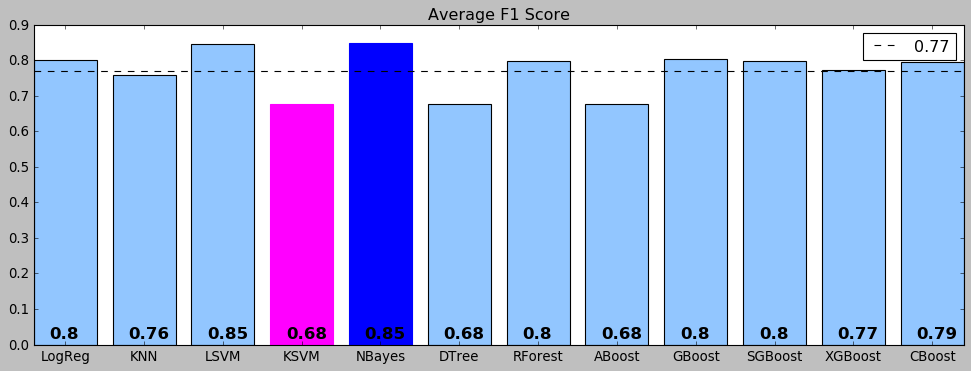

In [26]:
# Plotting F1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_cv, category='average', title= "Average F1 Score")

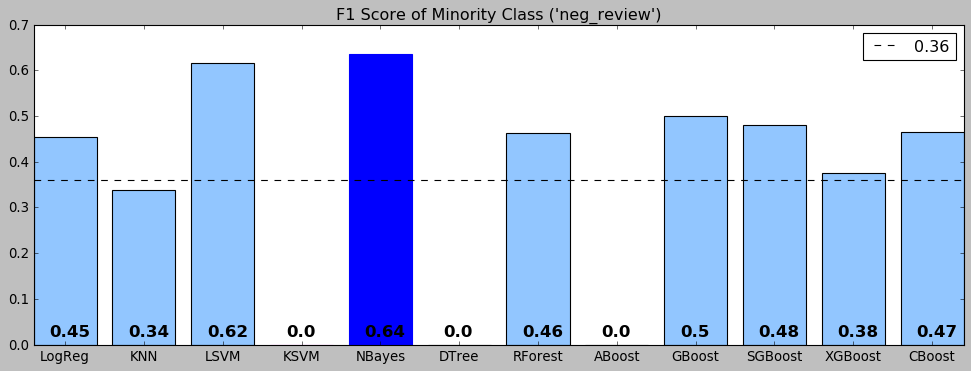

In [27]:
# Plotting F1 score of minority class ('neg_review') with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_cv, category='neg_review', title= "F1 Score of Minority Class ('neg_review')")

- The best scores with Count Vectorizer, both in average and minority class F1 score was made by Naive Bayes: 0.85 and 0.64 respectively.  
- LVSM also has a high average score of 0.85, but the minority score is lower (0.62).
- KSVM, Decision Tree and AdaBoost share the lowest average score of 0.68 and minority score of 0. 
- I will save the results for further comparison. 

In [28]:
df_cv2.to_csv('3a_CountVectorized.csv', sep=',', encoding='utf-8')